# Momento de Retroalimentación Bloque II

## Importación de paqueterías

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers

## Importing data

In [31]:
!unzip /content/drive/MyDrive/C/Séptimo\ Semestre/Modulo\ 3/data.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im37

## Data Preprocessing

In [32]:
image_size = 48
batch_size = 64

In [33]:
train_data = keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    validation_split= 0.3
)

validation_data = keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    validation_split = 0.3
)

test_data = keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255
)

In [34]:
train_data = train_data.flow_from_directory(
    '/content/train',
    target_size= (image_size, image_size),
    batch_size= batch_size,
    color_mode= 'grayscale',
    class_mode= 'categorical',
    subset= 'training'
)

validation_data = validation_data.flow_from_directory(
    '/content/test',
    target_size = (image_size,image_size),
    batch_size = batch_size,
    color_mode = "grayscale",
    class_mode = "categorical",
    subset = "validation"
)

test_data = test_data.flow_from_directory(
   '/content/test',
    target_size= (image_size, image_size),
    batch_size= batch_size,
    color_mode= 'grayscale',
    class_mode= 'categorical'
)

Found 20099 images belonging to 7 classes.
Found 2151 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Base-line Model

In [35]:
model = keras.Sequential([keras.Input(shape=(48, 48, 1)),
                          layers.Conv2D(filters= 32, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 64, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 128, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.Flatten(),
                          layers.Dense(7, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 128)       

In [37]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training the Model

In [38]:
history = model.fit(train_data, epochs= 10, validation_data= validation_data)

Epoch 1/10
315/315 [==============================] - 9s 27ms/step - loss: 1.7290 - accuracy: 0.3017 - val_loss: 1.5657 - val_accuracy: 0.4040
Epoch 2/10
315/315 [==============================] - 8s 25ms/step - loss: 1.5085 - accuracy: 0.4198 - val_loss: 1.4503 - val_accuracy: 0.4528
Epoch 3/10
315/315 [==============================] - 8s 24ms/step - loss: 1.3760 - accuracy: 0.4757 - val_loss: 1.3398 - val_accuracy: 0.5002
Epoch 4/10
315/315 [==============================] - 8s 24ms/step - loss: 1.2826 - accuracy: 0.5099 - val_loss: 1.2564 - val_accuracy: 0.5235
Epoch 5/10
315/315 [==============================] - 8s 24ms/step - loss: 1.2063 - accuracy: 0.5442 - val_loss: 1.2336 - val_accuracy: 0.5351
Epoch 6/10
315/315 [==============================] - 9s 28ms/step - loss: 1.1378 - accuracy: 0.5705 - val_loss: 1.2068 - val_accuracy: 0.5486
Epoch 7/10
315/315 [==============================] - 8s 24ms/step - loss: 1.0804 - accuracy: 0.5911 - val_loss: 1.1909 - val_accuracy: 0.5597

### Resulting Graphics

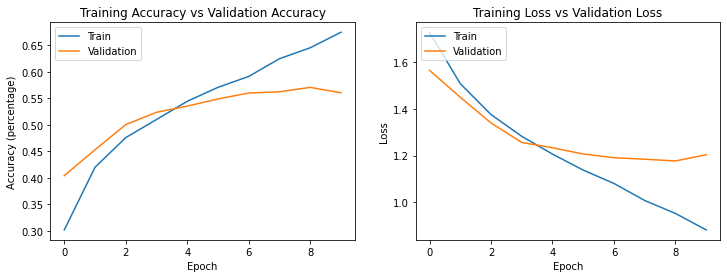

In [39]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy (percentage)')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Evaluate the model

In [40]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

113/113 [==============================] - 2s 20ms/step - loss: 1.2396 - accuracy: 0.5497
Test accuracy: 0.550


## Dense Layers

In [41]:
modelModified = keras.Sequential([keras.Input(shape=(48, 48, 1)),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 128, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 64, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 32, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(7, activation='softmax')
])

In [42]:
modelModified.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 46, 46, 256)       2560      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 21, 21, 128)       295040    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 64)        

In [43]:
modelModified.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training the Model

In [44]:
history = modelModified.fit(train_data, epochs= 10, validation_data= validation_data)

Epoch 1/10
315/315 [==============================] - 11s 34ms/step - loss: 1.8242 - accuracy: 0.2462 - val_loss: 1.8153 - val_accuracy: 0.2473
Epoch 2/10
315/315 [==============================] - 9s 29ms/step - loss: 1.7974 - accuracy: 0.2521 - val_loss: 1.7583 - val_accuracy: 0.2701
Epoch 3/10
315/315 [==============================] - 9s 29ms/step - loss: 1.6826 - accuracy: 0.3164 - val_loss: 1.5861 - val_accuracy: 0.3798
Epoch 4/10
315/315 [==============================] - 9s 29ms/step - loss: 1.5244 - accuracy: 0.4016 - val_loss: 1.4523 - val_accuracy: 0.4263
Epoch 5/10
315/315 [==============================] - 12s 37ms/step - loss: 1.4194 - accuracy: 0.4503 - val_loss: 1.3752 - val_accuracy: 0.4719
Epoch 6/10
315/315 [==============================] - 9s 29ms/step - loss: 1.3450 - accuracy: 0.4819 - val_loss: 1.3286 - val_accuracy: 0.4844
Epoch 7/10
315/315 [==============================] - 9s 30ms/step - loss: 1.2934 - accuracy: 0.4992 - val_loss: 1.2758 - val_accuracy: 0.51

### Resulting Graphics


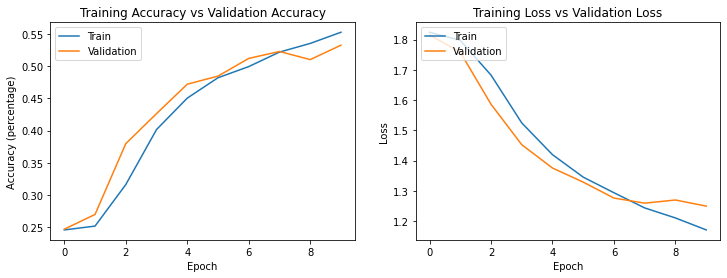

In [45]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy (percentage)')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Evaluate the Model

In [46]:
test_loss, test_acc = modelModified.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

113/113 [==============================] - 3s 23ms/step - loss: 1.2713 - accuracy: 0.5139
Test accuracy: 0.514


## Model with BatchNormalization

In [47]:
modelBatch = keras.Sequential([keras.Input(shape=(48, 48, 1)),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 128, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 64, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 32, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.Flatten(),
                          layers.Dense(7, activation='softmax')
])

In [48]:
modelBatch.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 46, 46, 256)       2560      
                                                                 
 batch_normalization_8 (Batc  (None, 46, 46, 256)      1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 23, 23, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 21, 21, 128)       295040    
                                                                 
 batch_normalization_9 (Batc  (None, 21, 21, 128)      512       
 hNormalization)                                                 
                                                      

In [49]:
modelBatch.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training the Model

In [50]:
history = modelBatch.fit(train_data, epochs= 10, validation_data= validation_data)

Epoch 1/10
315/315 [==============================] - 11s 34ms/step - loss: 1.6587 - accuracy: 0.3685 - val_loss: 1.8278 - val_accuracy: 0.2306
Epoch 2/10
315/315 [==============================] - 10s 33ms/step - loss: 1.3724 - accuracy: 0.4805 - val_loss: 1.8347 - val_accuracy: 0.3868
Epoch 3/10
315/315 [==============================] - 12s 37ms/step - loss: 1.2596 - accuracy: 0.5267 - val_loss: 1.7576 - val_accuracy: 0.3124
Epoch 4/10
315/315 [==============================] - 10s 33ms/step - loss: 1.1639 - accuracy: 0.5614 - val_loss: 1.4569 - val_accuracy: 0.4705
Epoch 5/10
315/315 [==============================] - 10s 33ms/step - loss: 1.0745 - accuracy: 0.5971 - val_loss: 1.5447 - val_accuracy: 0.3993
Epoch 6/10
315/315 [==============================] - 10s 33ms/step - loss: 1.0121 - accuracy: 0.6237 - val_loss: 1.3343 - val_accuracy: 0.5216
Epoch 7/10
315/315 [==============================] - 10s 33ms/step - loss: 0.9120 - accuracy: 0.6641 - val_loss: 1.5985 - val_accuracy:

### Resulting Graphics

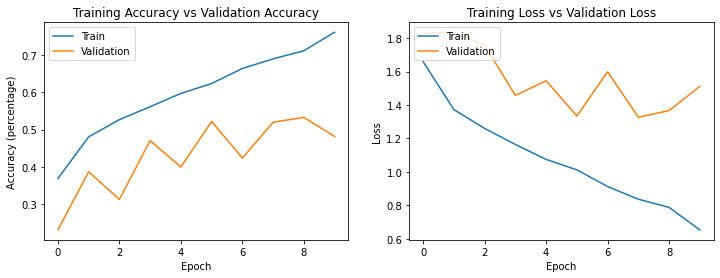

In [51]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy (percentage)')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Evaluate the Model

In [52]:
test_loss, test_acc = modelBatch.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

113/113 [==============================] - 3s 24ms/step - loss: 1.5388 - accuracy: 0.4738
Test accuracy: 0.474


## Model with BatchNormalization + Dropout

In [53]:
modelBD = keras.Sequential([keras.Input(shape=(48, 48, 1)),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Dropout(0.25),
                          layers.Conv2D(filters= 128, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 64, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Dropout(0.25),
                          layers.Conv2D(filters= 32, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.Flatten(),
                          layers.Dense(7, activation='softmax')
])

In [54]:
modelBD.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 46, 46, 256)       2560      
                                                                 
 batch_normalization_12 (Bat  (None, 46, 46, 256)      1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 23, 23, 256)      0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 23, 23, 256)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 21, 21, 128)       295040    
                                                                 
 batch_normalization_13 (Bat  (None, 21, 21, 128)     

In [55]:
modelBD.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training the Model

In [56]:
history = modelBD.fit(train_data, epochs= 10, validation_data= validation_data)

Epoch 1/10
315/315 [==============================] - 12s 36ms/step - loss: 1.7684 - accuracy: 0.3222 - val_loss: 1.8295 - val_accuracy: 0.2557
Epoch 2/10
315/315 [==============================] - 12s 39ms/step - loss: 1.4842 - accuracy: 0.4312 - val_loss: 1.6466 - val_accuracy: 0.3575
Epoch 3/10
315/315 [==============================] - 11s 36ms/step - loss: 1.3552 - accuracy: 0.4867 - val_loss: 1.5476 - val_accuracy: 0.3812
Epoch 4/10
315/315 [==============================] - 11s 36ms/step - loss: 1.2737 - accuracy: 0.5162 - val_loss: 1.4750 - val_accuracy: 0.4221
Epoch 5/10
315/315 [==============================] - 11s 35ms/step - loss: 1.2317 - accuracy: 0.5327 - val_loss: 1.4151 - val_accuracy: 0.4723
Epoch 6/10
315/315 [==============================] - 12s 39ms/step - loss: 1.1705 - accuracy: 0.5589 - val_loss: 1.2625 - val_accuracy: 0.5188
Epoch 7/10
315/315 [==============================] - 11s 35ms/step - loss: 1.1284 - accuracy: 0.5738 - val_loss: 1.5351 - val_accuracy:

### Resulting Graphics

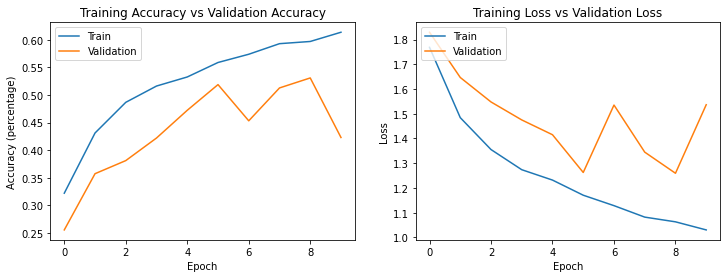

In [57]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy (percentage)')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Evaluate the Model

In [58]:
test_loss, test_acc = modelBD.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

113/113 [==============================] - 3s 24ms/step - loss: 1.5642 - accuracy: 0.4302
Test accuracy: 0.430
